***

<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.5.1 UV Coverage: UV tracks](4_5_1_uv_coverage_uv_tracks.ipynb)
    * Next: [4.6 The Fourier Approximation & the van Cittert-Zernike theorem](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb)

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import display
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D
import plotBL

In [3]:
HTML('../style/code_toggle.html')

HTML(value='../style/code_toggle.html')

***

### 4.5.2 提高$uv$覆盖 $uv$ coverage : Improving your $uv$ coverage

在[$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)，我们探讨了可见度函数的采样方法。采样跟干涉仪的纬度、源相关的投影基线、观测时间和频率有关，$uv$平面上采样顺着$uv$轨迹进行，而$uv$轨迹可以从($u$,$v$,$w$)参考系里的投影基线推算得到，$uv$轨迹是椭圆的局部。整个观测期间，沿着轨迹做的采样结果累积起来构成$uv$覆盖（$uv$ coverage）。为了精确测量天空，我们需要很好地了解可见度函数，因此需要对$uv$平面尽可能地进行全采样。

In [$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb), we have explored the ways in which the visibility function is sampled. Depending on the interferometer's location (in latitude), the projected baseline w.r.t. the observed source, and the time and frequency of our observation, the $uv$ plane is sampled along tracks which can be derived from the projected baseline in the ($u$,$v$,$w$) reference frame. These $uv$ tracks are portions of ellipses. Over the course of an observation, samples are accumulated along these tracks and form the *$uv$ coverage*.
To accurately measure the sky, we need a good knowledge of its attendant visibility function: we therefore need to sample the $uv$-plane as fully as possible.

<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

接下来，我们会看到，如何利用多元干涉仪([$\S$ 4.5.2.1 &#10549;](#vis:sec:4521))、时间([$\S$ 4.5.2.2 &#10549;](#vis:sec:4522))和频率([$\S$ 4.5.2.3 &#10549;](#vis:sec:4523))积分来提高$uv$覆盖。

We will see, in this section, how the $uv$ coverage can be improved using multiple element interferometers ([$\S$ 4.5.2.1 &#10549;](#vis:sec:4521))  and using time ([$\S$ 4.5.2.2 &#10549;](#vis:sec:4522)) and frequency ([$\S$ 4.5.2.3 &#10549;](#vis:sec:4523)) integration to our advantage.

<a id="vis:sec:4521"></a> <!---\label{vis:sec:4521}--->
#### 4.5.2.1 $N$元干涉仪配置 Configuration of an $N$-element interferometer

到目前位置，我们还只讨论了二元干涉仪。事实上，干涉仪都不止有两个天线构成。对于由N个天线构成的干涉仪来说，我们针对每个频道、每个时间、每个极化进行相应的$\frac{N(N-1)}{2}$互相关计算，因此，N元干涉仪的$uv$平面大约有$\sim N^2$个采样。

Until now, we only considered 2-element interferometers. In practice, interferometers are built from $N>2$  elements. We then compute the corresponding $\frac{N(N-1)}{2}$ independent cross-correlations (doing this for each frequency channel, each time step and each polarization). For an $N$-element interferometer, the sampling in the $uv$ plane is thus proportional to $\sim N^2$.

接下来，我们将展示一些已有的众所周知的干涉仪的$uv$覆盖特点，针对一个频率一个时间进行观测（也就是快照模式）。你可以从以下列表中任选一个阵列：

In the following, we will show the characteristic $uv$ coverage of existing, well-known radio interferometers, observing at a single frequency and for a single time step (i.e. a *snapshot* observation). You may select the array of your choice from the list below:

In [4]:
config = widgets.Dropdown(
    options={'VLAa':'configs/vlaa.enu.txt',
        'VLAb':'configs/vlab.enu.txt',
        'VLAc':'configs/vlac.enu.txt',
        'VLAd':'configs/vlad.enu.txt',
        'WSRT':'configs/wsrt.enu.txt',
        'kat7':'configs/kat-7.enu.txt',
        'meerkat':'configs/meerkat.enu.txt'},
    value="configs/vlaa.enu.txt",
    Description="Antennas:")

display(config)

Dropdown(options={'VLAa': 'configs/vlaa.enu.txt', 'VLAb': 'configs/vlab.enu.txt', 'VLAc': 'configs/vlac.enu.tx…

从上面的下拉列表，你可以选择某个真实设备的配置。然而，如果想在$ENU$参考系下自己指定天线位置，你可以对下面的代码进行编辑，并把变量"custom" 设置为"1"。

From the list above, you can select different configurations corresponding to real instrumental layouts.
However, if you want to specify the relative positions of the antennas in an $ENU$ reference frame yourself, you can edit the following block and set the variable "custom" to "1".

In [5]:
# you need to re-evaluate this box if you modify the array.
antennaPosition=np.genfromtxt(config.value)


In [6]:
# custom antenna distribution
custom=0
if (custom):
    antennaPosition = np.zeros((10, 2), dtype=float)
    antennaPosition[0,:] = [0,0]
    antennaPosition[1,:] = [-4, 5]
    antennaPosition[2,:] = [4, 5]
    antennaPosition[3,:] = [-10,0]
    antennaPosition[4,:] = [-8,-3]
    antennaPosition[5,:] = [-4,-5]
    antennaPosition[6,:] = [0,-6]
    antennaPosition[7,:] = [4,-5]
    antennaPosition[8,:] = [8,-3]
    antennaPosition[9,:] = [10,0]

Let's plot the distribution of the antennas from the selected (or customized) interferometer:

/work/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Antenna positions')

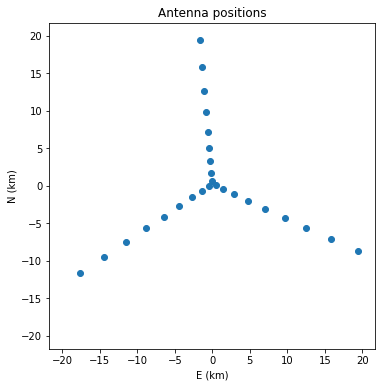

In [7]:
%matplotlib inline
mxabs = np.max(abs(antennaPosition[:]))*1.1;
# make use of pylab librery to plot
fig=plt.figure(figsize=(6,6))
plt.plot((antennaPosition[:,0]-np.mean(antennaPosition[:,0]))/1e3, \
         (antennaPosition[:,1]-np.mean(antennaPosition[:,1]))/1e3, 'o')
plt.axes().set_aspect('equal')
plt.xlim(-mxabs/1e3, mxabs/1e3)
plt.ylim(-mxabs/1e3, (mxabs+5)/1e3)
plt.xlabel("E (km)")
plt.ylabel("N (km)")
plt.title("Antenna positions")

<a id="fig:4414"></a>
**Figure 4.5.14**: $ENU$参考系下的天线布局。每个点代表一个天线。Distribution of the antennas in a $ENU$ reference frame. Each dot represents an antenna which will be part of $N$-1 baselines.

我们将把VLA作为默认的模拟例子。

As for the previous simulations, we will simulate an observation using the VLA as the default case.

##### 4.5.2.1.1 观测配置 Observation configuration

In [8]:
# Observation parameters
c=3e8                                         # Speed of light
f=1420e6                                      # Frequency
lam = c/f                                     # Wavelength 

time_steps = 1200                              # time steps
h = np.linspace(-6,6,num=time_steps)*np.pi/12 # Hour angle window

# declination convert in radian

L = np.radians(34.0790)      # Latitude of the VLA
dec = np.radians(34.)

#### 4.5.2.1.2 快照模式的$\boldsymbol{uv}$覆盖  The *snapshot* $\boldsymbol{uv}$ coverage

/work/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

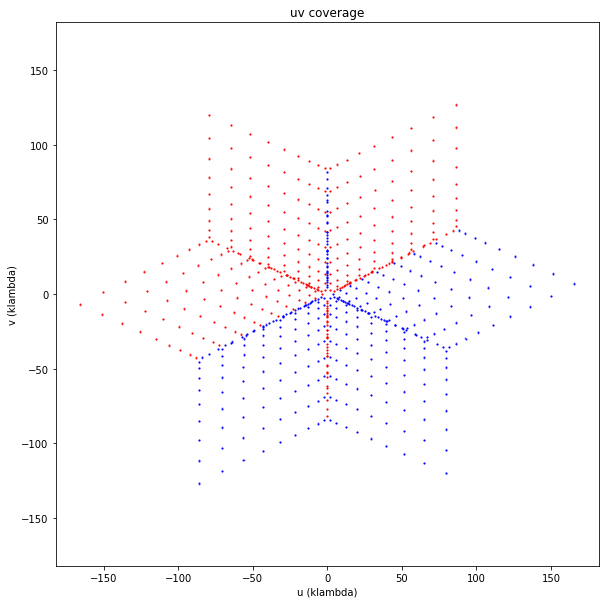

In [9]:
%matplotlib inline
Ntimes=3
plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)

<a id="vis:fig:4515"></a> <!---\label{vis:fig:4515}--->
**Figure 4.5.15**: 干涉仪快照模式的$uv$覆盖，红色和蓝色对应是对称的$uv$点，可以看出，每条基线对应一组可见度测量，即在($u$,$v$)处的可见度$V_\nu$和在($-u$,$-v$)处的复共轭可见度$V^*_\nu$。Snapshot $uv$ coverage of the interferometer. Red and blue points correspond to symmetric $uv$ points: indeed, each baseline gives us the measurement of $V_\nu$ at ($u$,$v$) __and__ its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

干涉仪的天线数量和布局不同，其快照$uv$ 覆盖的形状也会有所不同。对于天线阵列布局来说，瞬时$uv$覆盖大的（如VLA，图 [Fig. 4.5.15 &#10549;]）要优于$uv$覆盖小的。随着总灵敏度的提升，增加天线数量、优化天线布局成了提升瞬时$uv$覆盖的主要动因。下一节，我们将讨论如果利用地球的自传来提升$uv$覆盖。

Depending on the number of elements and their relative distribution on the ground, the shape of the snapshot $uv$ coverage can vary dramatically from one interferometer to another. One may prefer an antenna distribution which maximizes an instantaneous coverage which spans the entire $uv$ plane (e.g. VLA in [Fig. 4.5.15 &#10549;](#vis:fig:4515)) rather than a compact array which samples a smaller portion of the $uv$ plane. With the raw increase of total sensitivity, improving the instantaneous $uv$ coverage is the main motivation for increasing the number of antennas and optimising their relative positions. A *good* $uv$ coverage is obtained if the $uv$ plane is sufficiently - and smoothly! - sampled. In the next section, we will see how the Earth contributes to improve the $uv$ coverage.

<a id="vis:sec:4522"></a> <!---\label{vis:sec:4522}--->
#### 4.5.2.3 时间积分：地球自转合成  Time integration: Earth Rotation Synthesis

对源进行连续几个小时的观测，需要对源进行条纹（或者延迟）跟踪。随着源的移动，投影基线也会沿着椭圆$uv$轨迹发生位置上的变化。观测期间，只要沿着$uv$轨迹进行足够时间的采样，就有可能获得$\frac{N(N-1)}{2}\times N_\text{times}$数量的独立可见度测量结果。

Observing a source for several hours requires tracking this source with fringe (or delay) tracking. As the source moves with the sky, the projected baselines - as seen from the source - will continuously vary along elliptical $uv$ tracks.
With good enough time sampling, it is possible to sample each $uv$ track along the observation and accumulate a number of $\frac{N(N-1)}{2}\times N_\text{times}$ independent measurements.

下面的实验，调整观测的时间步数（time steps），从一次快照观测到连续12小时观测。

The following experiment will allow you to change the number of time steps collected during an observation, from a snapshot observation up to a 12 hour observation.

下面的代码将首先画出一次快照观测，然后利用下面的滑块增加观测的步数，计算出相应的 $uv$ 覆盖，为了方便比较，新的$uv$ 覆盖图将直接放在下面。比较 time steps=2，300，1200三种情况下的$uv$ 覆盖效果，采样次数越多，notebook花费的计算和成图时间越长。

The next block will let you plot a snapshot observation. You can increase the duration of the observation with the slider which defines the total number of time steps for which the $uv$ coverage is computed. When using the slider, the new resulting plot will be generated next to the previous one to allow for visual comparisons.

(Test values of 2, $\sim$300, $\sim$1200 to see the effects on the $uv$ coverage. Give the notebook some time to regenerate the plot, especially for large values of time samples!).

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
  # Remove the CWD from sys.path while we load stuff.


IntSlider(value=2, continuous_update=False, description='Ntimes', max=1200, min=2, step=100)

Ntimes=2


/data/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

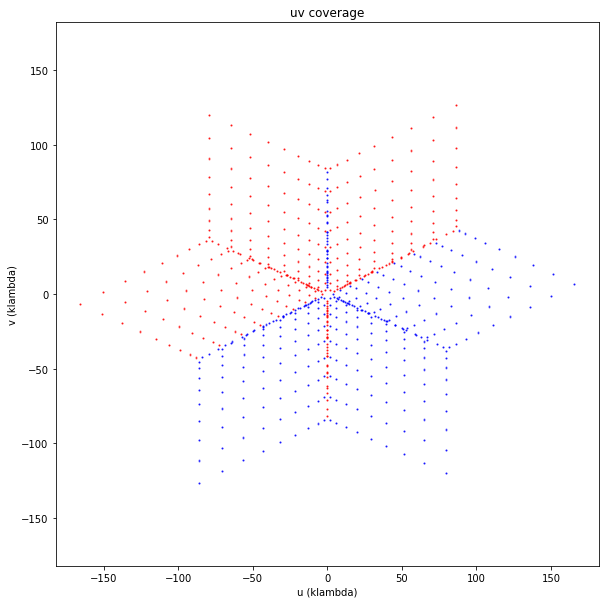

Ntimes=302


<Figure size 432x288 with 0 Axes>

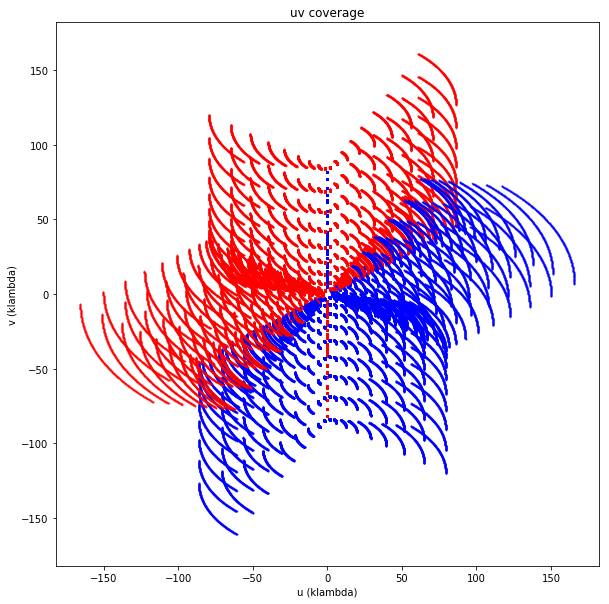

In [10]:
from ipywidgets import *
from IPython.display import display

def Interactplot(key,Ntimes):
    print("Ntimes="+str(Ntimes))
    plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)
    
slider=IntSlider(description="Ntimes",min=2,max=1200,step=100,continuous_update=False)

slider.on_trait_change(Interactplot,'value')
display(slider)
Interactplot("",2)

<a id="fig:4416"></a>
**Figure 4.5.16**: 不同采样次数情况下干涉仪的$uv$ 覆盖，红色和蓝色表示对称的$uv$点，可以看出，每条基线对应一组可见度测量，即在($u$,$v$)处的可见度$V_\nu$和在($-u$,$-v$)处的复共轭可见度$V^*_\nu$。Sampled $uv$ coverage of the interferometer for various values of time samples. Red and blue points corresponds to symmetric $uv$ points, since each baseline give us the measurement of $V_\nu$ at ($u$,$v$) **and** its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

随着时间步数的增加，你可以清楚看到$uv$平面上的每条基线的椭圆轨迹。观测时间越长，可见度函数采样越好。

With an increasing number of time steps, you can start to see each individual baselines' elliptical $uv$ track in the $uv$ plane. It is easy to see that the longer the observation, the better our sampling of the visibility function.

<a id="vis:sec:4523"></a> <!---\label{vis:sec:4523}--->
#### 4.5.2.3 频率积分：频率合成  Integration in frequency: Frequency Synthesis

从 [$\S$ 4.3 &#10142;](4_2_The_2-element_Interferometer.ipynb) 可以看到，我们通常会用波长$\lambda$对$u$、$v$、$w$ 坐标进行归一化处理，其结果是，同一个干涉仪在不同频率上进行测量，会得到不同的空间频率。同一条基线对不同频率进行($u,v$)采样，相当于是改变了投影基线的比例，同一条基线分别对波长$\lambda_1$和$\lambda_2$进行快照采样，如果$\lambda_2$ < $\lambda_1$，则$\lambda_2$的$uv$覆盖相当于缩小了的$\lambda_1$的$uv$覆盖。

We have seen in [$\S$ 4.3 &#10142;](4_2_The_2-element_Interferometer.ipynb) that the $u$, $v$, $w$ coordinates are usually normalized by $\lambda$. As a consequence, observing with the *same* interferometer at a *different* frequency gives a different set of spatial frequencies. Sampling the ($u,v$)-plane with the same baseline and two diffe frequencies is equivalent to **rescaling** the projected baseline. Indeed, for the same snapshot $uv$ coverage at wavelength $\lambda_1$, the $uv$ coverage at $\lambda_2 < \lambda_1$ will be a shrunk version of that a $\lambda_1$. 

如果采样频率连续或者准连续，比如，观测系统在[$f_\text{min}$,$f_\text{max}$]的带宽范围内$N_\text{freqs}$个频道上工作，我们在$uv$平面上能得到$\frac{N(N-1)}{2}\times N_\text{freqs}$个独立测量值。由于这种$u$ 和 $v$的频率缩放效果，每条基线都将生成一条径向的轨迹。

If the distribution of our sampling frequencies is (quasi) continuous, e.g. if the observing system operates in a bandwidth [$f_\text{min}$,$f_\text{max}$], with $N_\text{freqs}$ channels, we can contiguously sample portions of the $uv$ plane with $\frac{N(N-1)}{2}\times N_\text{freqs}$ independent measurements. For each baseline, a radial track will be generated due to the frequency scaling effect of $u$ and $v$.

<div class=warn>
<b>Warning:</b> It is only possible to do this up to a point: see *bandwidth smearing* in [$\S$ 9.3 &#10142;](../9_Practical/9_3_observing_smearing.ipynb)) for more details on the limits of this technique.
</div>
<span style="background-color:cyan">TLG:GM: Check if the italic words are in the glossary. </span>

下面我们将画出一次快照观测，拖动滑块，增加连续频道数量（10MHz步长）。每改变一次滑块值，会在下面画出新的uv覆盖图（注意，成图需要时间，请等待），可以测试一下频道数量为1、20、200的uv覆盖效果。

In the next block, we will plot a snapshot observation. You can increase the number of continuous frequency channels  (at 10 MHz steps) with the slider. Upon a change on the slider, a new plot will be generated next to the previous one, to allow visual comparisons (Note: give the notebook some time to generate the plot).

(Test values of 1, 20, 200 to see the effects on the $uv$ coverage).

In [16]:
df=10e6 # frequency step
f0=c/lam # starting frequency
lamb0=lam # starting wavelength


def Interactplot(key,Nfreqs):
    print("Nfreqs="+str(Nfreqs))
    plotBL.plotuv_freq(antennaPosition,L,dec,h,Nfreqs,lamb0,df)
    
slider=IntSlider(description="Nfreqs",min=1,max=200,step=1,continuous_update=False)

slider.on_trait_change(Interactplot,'value')
display(slider)
Interactplot("",1)

/data/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: on_trait_change is deprecated in traitlets 4.1: use observe instead
  if sys.path[0] == '':


IntSlider(value=1, continuous_update=False, description='Nfreqs', max=200, min=1)

Nfreqs=1


TypeError: 'float' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Nfreqs=51


TypeError: 'float' object cannot be interpreted as an integer

<Figure size 432x288 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<a id="fig:4417"></a>
**Figure 4.5.17**: 不同频道数量情况下干涉仪的$uv$ 覆盖，红色和蓝色表示对称的$uv$点，每条基线对应一组可见度测量，即在($u$,$v$)处的可见度$V_\nu$和在($-u$,$-v$)处的复共轭可见度$V^*_\nu$。Snapshot $uv$ coverage of the interferometer for various numbers of frequency channels. Red and blue points corresponds to symmetric $uv$ points, since each baseline give us the measurement of $V_\nu$ at ($u$,$v$) **and** its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

随着频道数量的增加，每条基线得到uv平面上的一条径向轨迹。容易看出，频道越多，可见度函数采样越好，起码理论上是这样。

With an increasing number of frequency channels, you can see each individual baseline following a radial track on the $uv$-plane. It is easy to see that the more frequency channels you allocate to an observation, the better the sampling of the visibility function (theoretically at least!).

#### 4.5.2.4 结论 Conclusion

干涉仪测得的是$uv$平面。

The $uv$ plane is what an interferometers actually measures.

理想情况下，$uv$平面相当于我们想要测量的可见度函数，通过$uv$覆盖，我们知道了要对哪些可见度函数进行采样。

In an ideal case, this plane is equivalent to the visibility function, which what we **want** to measure. The $uv$-coverage of an observation tells us which parts of the visibility function has been sampled.

[$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb)向我们展示了随着地球自转单条基线所产生的椭圆形的采样轨迹。根据干涉仪在地球上的位置、源的方向以及基线参数，可以事先预测得到采样轨迹。$uv$轨迹是空间频率（即$uv$点）的一部分，观测过程中，单条基线将沿着这条路径进行采样。

In [$\S$ 4.5.1 &#10142;](4_5_1_uv_coverage_uv_tracks.ipynb), we showed that sampling the $uv$-plane with a single baseline amounts to sampling along an elliptical track due to the rotation of the Earth. The track's parameters can be predicted if we know the location of the interferometer on Earth, the direction of the source and the baseline characteristics. The $uv$-track is thus the set of spatial frequencies (i.e.$uv$ points) which a single baseline will sample over the course of an observation.

[$\S$ 4.5.2 &#10549;](4_5_2_uv_coverage_improving_your_coverage.ipynb)讨论了三种提高uv覆盖的方法：1、通过增加天线数目、调整天线布局的方法，提高瞬时空间覆盖；2、观测源随着天球旋转，带来投影基线的连续变化，相应地，$uv$采样点呈椭圆轨迹。天文学家利用上述特点进行长时间积分，从而以较少的天线提高uv覆盖。需要注意的是，这种技术提高了计算成本；3、使用宽带接收机，在多个频率上进行采样，从而在径向上提高uv覆盖。这种方法的局限性在于仪器的灵敏度和仪器的点源响应（参见 [$\S$ 9.3 &#10142;](../9_Practical/9_3_Observing_smearing.ipynb))。

In [$\S$ 4.5.2 &#10549;](4_5_2_uv_coverage_improving_your_coverage.ipynb), we discussed three different ways of improving your $uv$ coverage. Firstly, we can increase the number of antennas and alter their distribution: this improves the *instantaneous* spatial coverage. Second, we can use the fact that the observed source is moving with the Celestial Sphere (i.e. the Earth spins). The continuous variation of the projected baseline - and therefore its $u,v$-coordinates - allow us to sample portions of elliptical $uv$ tracks. 

A long integration time allows astronomers to easily improve their $uv$-plane coverage at little cost. Note that maximising using this technique to improve $uv$-coverage will require taking more measurements in time, thus increasing computational costs.

Thirdly, by using broadband receivers, we can sample the visibilities at various frequencies and compute the cross-correlations in different frequency channels. By doing so, the $uv$-coverage is improved along radial $uv$ tracks.
Of course, these methods cannot extend our $uv$-coverage arbitrarily. They are limited by both the instrument sensitivity and the instrument's point source response (see [$\S$ 9.3 &#10142;](../9_Practical/9_3_Observing_smearing.ipynb)).

在 [$\S$ 4.6  &#10142;](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb)，我们将阐明

In [$\S$ 4.6  &#10142;](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb) we will explicitly enunciate the underlying hypotheses we relied on in the previous section. This section is required before we can begin to treat the topic of *imaging* in [$\S$ 5 &#10142;](../5_Imaging/5_0_introduction.ipynb).

<p class=conclusion>
<font size=4><b>Important things to remember</b></font>
<br>
<br>
&bull; 天线数量及其非冗余布局对提高瞬时uv覆盖至关重要。The number of antennas and their non-redundant distribution are important factors to improve the *snapshot* $uv$ coverage.<br>
&bull; 利用地球自转构建每条基线的椭圆uv轨迹，同时也产生了时间拖影。Time integration using Earth Rotation Synthesis (a technique known in the literature as *supersynthesis*) builds up the elliptical $uv$ tracks of each baseline, but generates <em>time smearing</em>.<br>
&bull; 在由多个频道构成的大的带宽范围内进行连续采样，也有助于提高uv的径向覆盖，同时也带来了频率拖影。Frequency integration - observing in a larger bandwidth composed of multiple contiguous channels - also helps improve the $uv$ coverage radially, but generates <em>frequency smearing</em>.<br>
</p>

#### Format status:

* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: 09/02/2017
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 09/02/2017

***

* Next: [4.6 The Fourier Approximation & the van Cittert-Zernike theorem](4_6_the_fourier_approximation_van_cittert-zernike_theorem.ipynb)